<a href="https://www.kaggle.com/code/utkarshx27/eda-of-abortion-attitudes-in?scriptVersionId=129191350" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abortion-opinions-in-the-general-social-survey/gss_abortion.csv


# Import Necessary Libraries and Load Data

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/abortion-opinions-in-the-general-social-survey/gss_abortion.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df.describe()

Unnamed: 0            id          year           age   hispaniccat  \
count  64814.000000  64814.000000  64814.000000  64586.000000  26650.000000   
mean   32407.500000   1151.810211   1994.939180     46.099356      1.595122   
std    18710.334511    828.030233     13.465368     17.534703      3.568226   
min        1.000000      1.000000   1972.000000     18.000000      1.000000   
25%    16204.250000    507.000000   1984.000000     31.000000      1.000000   
50%    32407.500000   1029.500000   1996.000000     44.000000      1.000000   
75%    48610.750000   1570.000000   2006.000000     59.000000      1.000000   
max    64814.000000   4510.000000   2018.000000     89.000000     50.000000   

               educ      relactiv         abany      abdefect      abnomore  \
count  64637.000000  19233.000000  36794.000000  44152.000000  44072.000000   
mean      12.869688      3.047107      0.414035      0.796702      0.446134   
std        3.176316      2.392416      0.492561      0.402457      0.497096   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%       12.000000      1.000000      0.000000      1.000000      0.000000   
50%       12.000000      2.000000      0.000000      1.000000      0.000000   
75%       15.000000      4.000000      1.000000      1.000000      1.000000   
max       20.000000     11.000000      1.000000      1.000000      1.000000   

             abhlth        abpoor        abrape      absingle           pid  \
count  44360.000000  44023.000000  43922.000000  44020.000000  63324.000000   
mean       0.896055      0.472253      0.813852      0.441527      2.668799   
std        0.305193      0.499235      0.389231      0.496575      1.985922   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      1.000000      0.000000      1.000000   
50%        1.000000      0.000000      1.000000      0.000000      3.000000   
75%        1.000000      1.000000      1.000000      1.000000      5.000000   
max        1.000000      1.000000      1.000000      1.000000      6.000000   

           hispanic  
count  26650.000000  
mean       0.116135  
std        0.320393  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

# Missing Values

In [4]:
df.isnull().sum()

Unnamed: 0         0
id                 0
year               0
age              228
race               0
sex                0
hispaniccat    38164
educ             177
partyid          418
relactiv       45581
abany          28020
abdefect       20662
abnomore       20742
abhlth         20454
abpoor         20791
abrape         20892
absingle       20794
pid             1490
hispanic       38164
dtype: int64

# Data Preprocessing

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['educ'].fillna(df['educ'].mode()[0], inplace=True)
df['partyid'].fillna(df['partyid'].mode()[0], inplace=True)
df['pid'].fillna(df['pid'].mode()[0], inplace=True)
df['relactiv'].fillna('Not applicable', inplace=True)
df['hispaniccat'].fillna('Not Hispanic', inplace=True)
df['hispanic'].fillna('Not Hispanic', inplace=True)
df[['abany', 'abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle']] = \
df[['abany', 'abdefect', 'abnomore', 'abhlth', 'abpoor', 'abrape', 'absingle']].fillna(0)

In [6]:
df.head()

id  year   age   race     sex   hispaniccat  educ           partyid  \
0   1  1972  23.0  White  Female  Not Hispanic  16.0      Ind,Near Dem   
1   2  1972  70.0  White    Male  Not Hispanic  10.0  Not Str Democrat   
2   3  1972  48.0  White  Female  Not Hispanic  12.0       Independent   
3   4  1972  27.0  White  Female  Not Hispanic  17.0  Not Str Democrat   
4   5  1972  61.0  White  Female  Not Hispanic  12.0   Strong Democrat   

         relactiv  abany  abdefect  abnomore  abhlth  abpoor  abrape  \
0  Not applicable    0.0       1.0       1.0     1.0     1.0     1.0   
1  Not applicable    0.0       1.0       0.0     1.0     0.0     1.0   
2  Not applicable    0.0       1.0       1.0     1.0     1.0     1.0   
3  Not applicable    0.0       0.0       0.0     1.0     1.0     1.0   
4  Not applicable    0.0       1.0       1.0     1.0     1.0     1.0   

   absingle  pid      hispanic  
0       1.0  2.0  Not Hispanic  
1       1.0  1.0  Not Hispanic  
2       1.0  3.0  Not Hispanic  
3       1.0  1.0  Not Hispanic  
4       1.0  0.0  Not Hispanic

# Exploratory Data Analysis

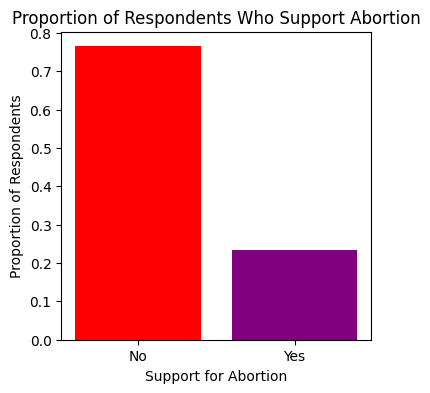

In [7]:
abany_counts = df["abany"].value_counts(normalize=True)
plt.figure(figsize=(4,4))
plt.bar(x=abany_counts.index, height=abany_counts.values, color=["red", "purple"])
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Proportion of Respondents Who Support Abortion")
plt.xlabel("Support for Abortion")
plt.ylabel("Proportion of Respondents")
plt.show()

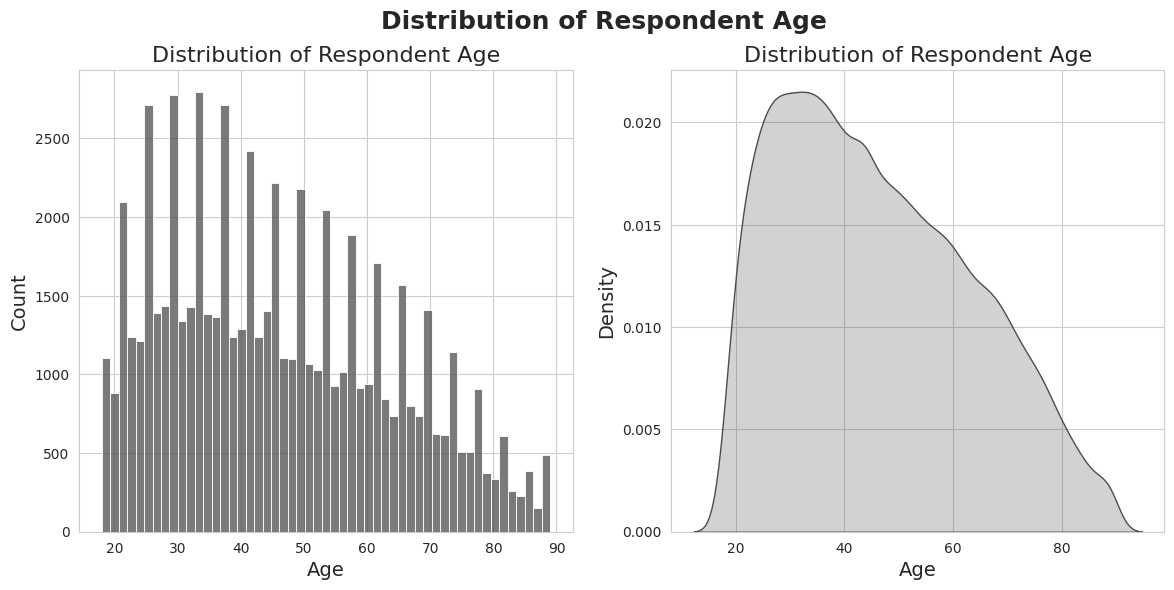

In [8]:
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
sns.histplot(data=df, x='age', kde=False, ax=ax1, color='#4d4d4d')
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Distribution of Respondent Age', fontsize=16)
sns.kdeplot(data=df, x='age', fill=True, ax=ax2, color='#4d4d4d')
ax2.set_xlabel('Age', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('Distribution of Respondent Age', fontsize=16)
fig.suptitle('Distribution of Respondent Age', fontsize=18, fontweight='bold')
plt.show()

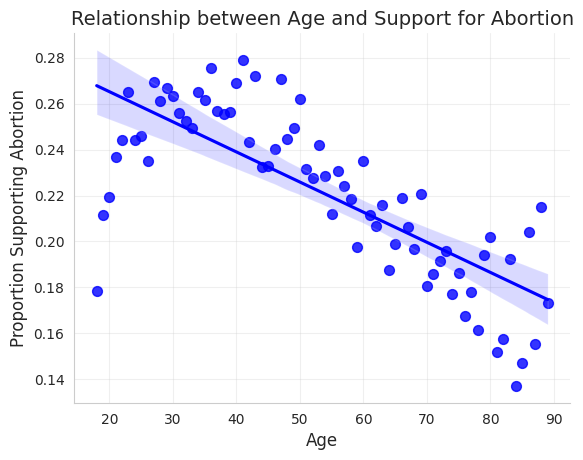

In [9]:
age_grouped = df.groupby('age')['abany'].mean()
sns.regplot(x=age_grouped.index, y=age_grouped, color='blue', scatter_kws={'s': 50})
sns.despine()
plt.xlabel('Age', fontsize=12)
plt.ylabel('Proportion Supporting Abortion', fontsize=12)
plt.title('Relationship between Age and Support for Abortion', fontsize=14)
plt.grid(axis='both', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

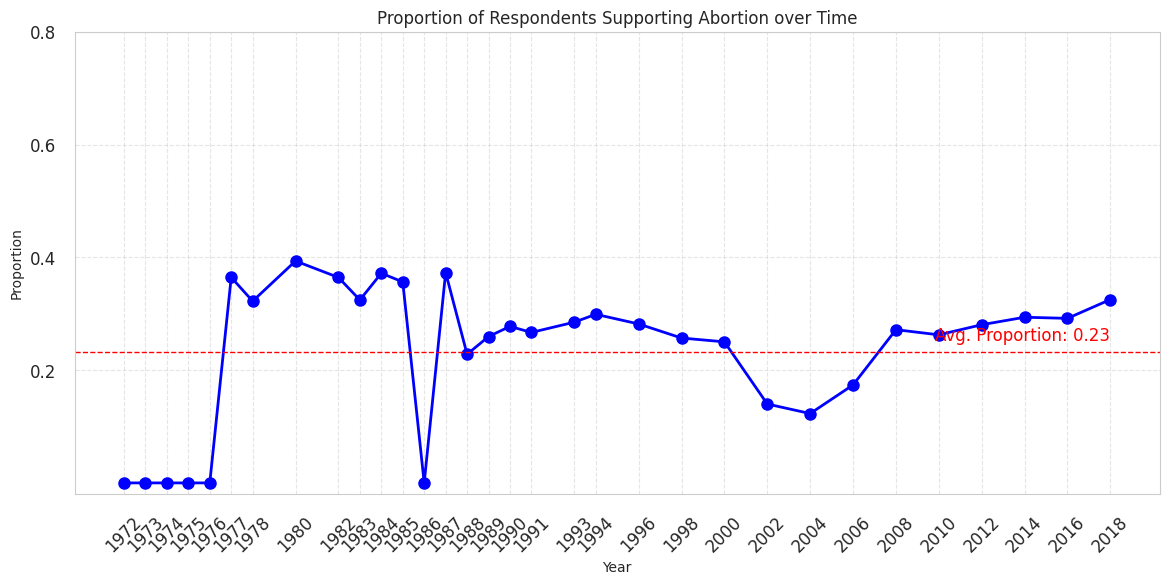

In [10]:
abortion_prop = df.groupby('year')['abany'].mean()
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(abortion_prop.index, abortion_prop.values, marker='o', markersize=8, linewidth=2, color='blue')

ax.set_xlabel('Year')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Respondents Supporting Abortion over Time')
ax.set_xticks(abortion_prop.index)
ax.tick_params(axis='x', which='major', labelsize=12, pad=10, rotation=45)
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.tick_params(axis='y', which='major', labelsize=12, pad=10)
ax.grid(axis='y', linestyle='--', alpha=0.5)

avg_prop = abortion_prop.mean()
ax.axhline(avg_prop, linestyle='--', color='red', linewidth=1)
ax.text(abortion_prop.index[-1], avg_prop+0.02, f'Avg. Proportion: {avg_prop:.2f}', ha='right', fontsize=12, color='red')
plt.show()

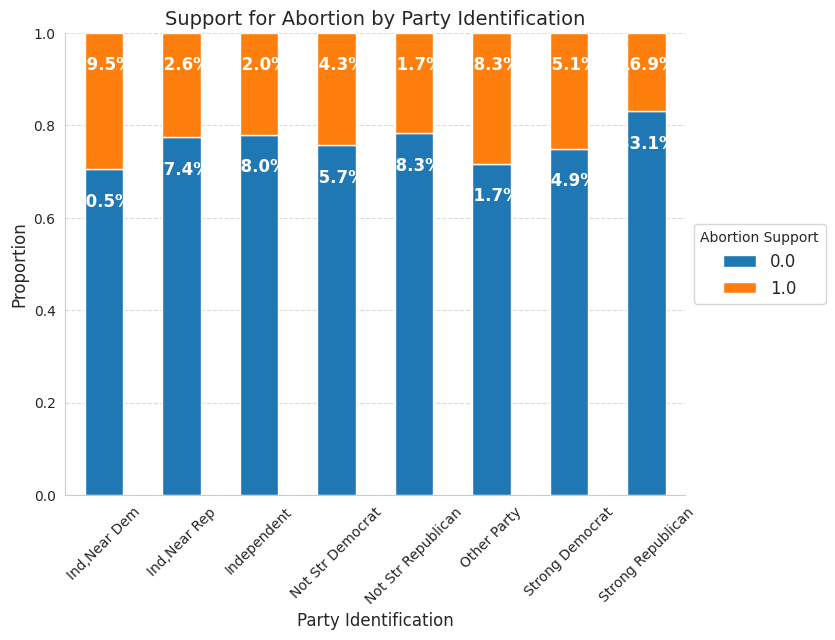

In [11]:
colors = ['#1f77b4', '#ff7f0e']
cross_tab = pd.crosstab(df['partyid'], df['abany'], normalize='index')
ax = cross_tab.plot(kind='bar', stacked=True, color=colors, figsize=(8,6))
ax.set_xlabel('Party Identification', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.set_title('Support for Abortion by Party Identification', fontsize=14)
ax.legend(title='Abortion Support', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 1)
for i in range(len(cross_tab)):
    for j in range(len(cross_tab.columns)):
        plt.text(i, cross_tab.iloc[i, :j+1].sum() - 0.05, str(round(cross_tab.iloc[i, j]*100,1)) + '%', ha='center', va='top', fontsize=12, fontweight='bold', color='white')
plt.show()

/tmp/ipykernel_21/1521115920.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


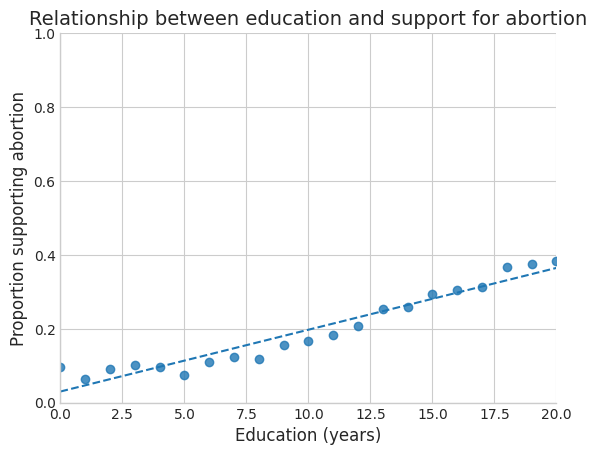

In [12]:
plt.style.use('seaborn-whitegrid')
colors = ['#1f77b4']
educ_abany_prop = df.groupby('educ')['abany'].mean()
plt.scatter(educ_abany_prop.index, educ_abany_prop.values, color=colors, alpha=0.8)
z = np.polyfit(educ_abany_prop.index, educ_abany_prop, 1)
p = np.poly1d(z)
plt.plot(educ_abany_prop.index, p(educ_abany_prop.index), color=colors[0], linestyle='--')
plt.xlabel('Education (years)', fontsize=12)
plt.ylabel('Proportion supporting abortion', fontsize=12)
plt.title('Relationship between education and support for abortion', fontsize=14)
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

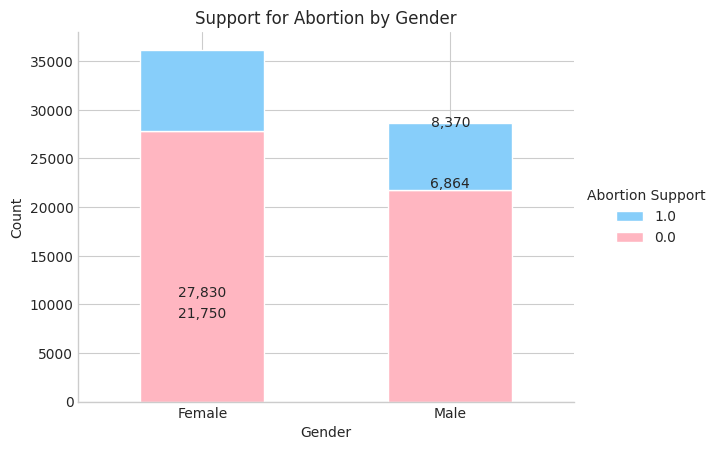

In [13]:
ct = pd.crosstab(df['sex'], df['abany'])
colors = ['#FFB6C1', '#87CEFA']
ax = ct.plot(kind='bar', stacked=True, color=colors)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Support for Abortion by Gender')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Abortion Support', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, row in ct.iterrows():
    for j, val in enumerate(row):
        if val > 0:
            ax.text(j, sum(row[:j+1])-0.9*val, f'{val:,}', ha='center', va='center')    # fix

            
            
plt.show()

In [14]:
table = pd.crosstab(df.race, df.abany, normalize='index')
colors = ['#1f77b4', '#ff7f0e']
table.plot(kind='bar', stacked=True, color=colors, alpha=0.8)
plt.title('Support for Abortion by Race/Ethnicity', fontsize=14, fontweight='bold')
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Oppose', 'Support'], title='Abortion Support', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)
plt.tight_layout()
plt.show()

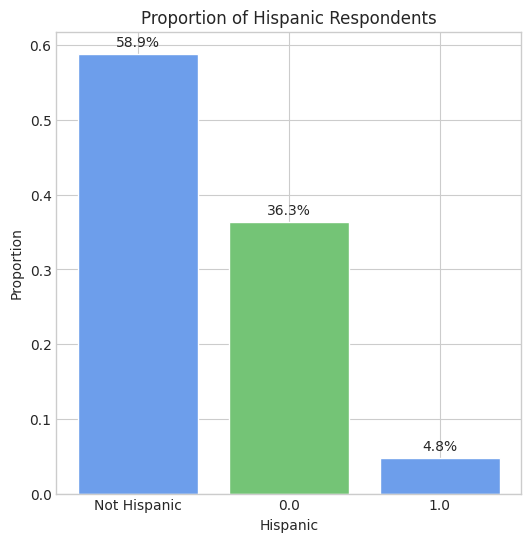

In [15]:
hispanic_prop = df['hispanic'].value_counts(normalize=True)
x_labels = [str(val) for val in hispanic_prop.index]
colors = ['#6d9eeb', '#74c476']
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(x_labels, hispanic_prop.values, color=colors)
ax.set_title('Proportion of Hispanic Respondents')
ax.set_xlabel('Hispanic')
ax.set_ylabel('Proportion')
for i, v in enumerate(hispanic_prop.values):
    ax.text(i, v + 0.01, '{:.1%}'.format(v), ha='center')
plt.show()

In [16]:
abortion_by_religactiv = df.groupby('relactiv')['abany'].mean().reset_index()
palette = sns.color_palette('pastel')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data=abortion_by_religactiv, x='relactiv', y='abany', palette=palette)
ax.set_xlabel('Religious Activity', fontsize=14, fontweight='bold')
ax.set_ylabel('Proportion Supporting Abortion', fontsize=14, fontweight='bold')
ax.set_title('Support for Abortion by Level of Religious Activity', fontsize=16, fontweight='bold')
sns.despine()
plt.show()

# Thankyou